# Homework Module 4

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score

## Data Preparation

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11914 non-null  object 
 4   engine_hp          11914 non-null  float64
 5   engine_cylinders   11914 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11914 non-null  float64
 9   market_category    11914 non-null  object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [33]:
# features for homework
# ["make", "model", "year", "engine_hp", "engine_cylinders", "transmission_type", "vehicle_style", "highway_mpg", "city_mpg"]

numerical = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]
categorical = ["make", "model", "transmission_type", "vehicle_style", ]
features = numerical+categorical
target = "above_average"

In [22]:
df_prep = df[features + ['msrp']]

In [23]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               11914 non-null  int64  
 1   engine_hp          11914 non-null  float64
 2   engine_cylinders   11914 non-null  float64
 3   highway_mpg        11914 non-null  int64  
 4   city_mpg           11914 non-null  int64  
 5   make               11914 non-null  object 
 6   model              11914 non-null  object 
 7   transmission_type  11914 non-null  object 
 8   vehicle_style      11914 non-null  object 
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [29]:
price_mean = df_prep['msrp'].mean()
print(price_mean)
def above_average(price):
    if price > price_mean:
        return 1
    else:
        return 0

40594.737032063116


In [25]:
df_prep['above_average'] = df_prep['msrp'].apply(above_average)

/var/folders/8l/7m5kpzns2z542lw1gdxzvnbh0000gn/T/ipykernel_13678/183188168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['above_average'] = df_prep['msrp'].apply(above_average)


In [26]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               11914 non-null  int64  
 1   engine_hp          11914 non-null  float64
 2   engine_cylinders   11914 non-null  float64
 3   highway_mpg        11914 non-null  int64  
 4   city_mpg           11914 non-null  int64  
 5   make               11914 non-null  object 
 6   model              11914 non-null  object 
 7   transmission_type  11914 non-null  object 
 8   vehicle_style      11914 non-null  object 
 9   msrp               11914 non-null  int64  
 10  above_average      11914 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1024.0+ KB


In [28]:
df_prep[['msrp', 'above_average']]

,msrp,above_average
0,46135,1
1,40650,1
2,36350,0
3,29450,0
4,34500,0
...,...,...
11909,46120,1
11910,56670,1
11911,50620,1
11912,50920,1


In [80]:
df_full_train, df_test = train_test_split(df_prep, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Question 1

In [38]:
def compute_roc_auc_feature_importance(df_train, target):
    feature_importances = []
    for feature in numerical:
        score = df_train[feature]
        y_true = df_train[target]
        auc = roc_auc_score(y_true, score)
        if auc < 0.5:
            score = -score
            auc = roc_auc_score(y_true, score)
        feature_importances.append((feature, auc))

    return sorted(feature_importances, key=lambda x:x[1], reverse=True)

In [41]:
feature_importance = compute_roc_auc_feature_importance(df_train, target)

In [42]:
feature_importance

[('engine_hp', 0.9171031265539011),
 ('engine_cylinders', 0.766116490165669),
 ('year', 0.687551492804683),
 ('city_mpg', 0.6734244643245233),
 ('highway_mpg', 0.6330587871772013)]

engine_hp appears to have the highest AUC

# Question 2

In [81]:
# y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [78]:
# del df_full_train['msrp']
# del df_full_train['above_average']

In [45]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [47]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [55]:
y_pred_prob = model.predict_proba(X_val)[:, 1]

In [56]:
score = round(roc_auc_score(y_val, y_pred_prob), 3)
print(f"ROC AUC score: {score}")

ROC AUC score: 0.98


Closest answer is .979

# Question 3

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


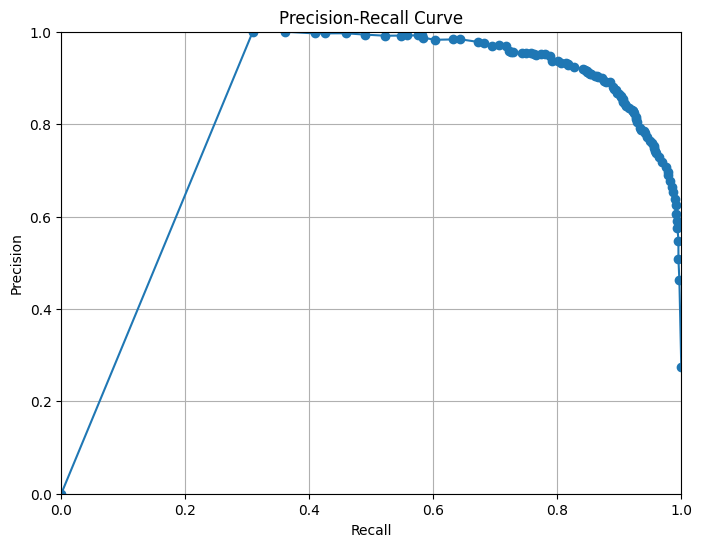

In [65]:
precision_values = []
recall_values = []

thresholds = np.arange(0.0, 1.01, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


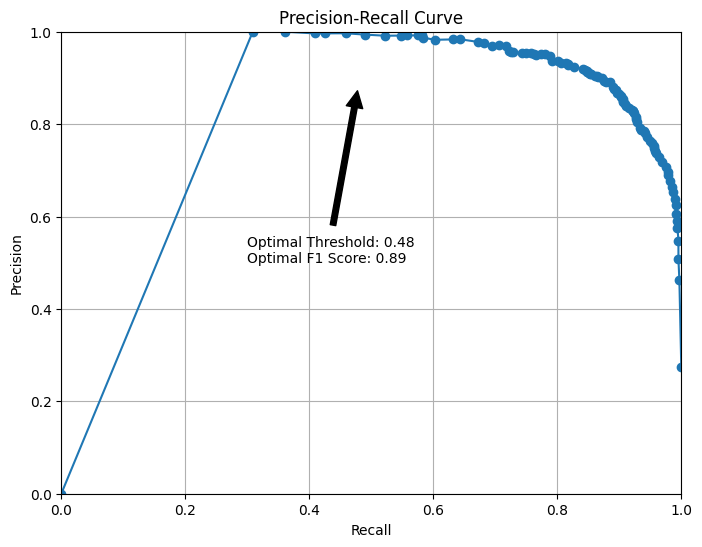

In [71]:

thresholds = np.arange(0.0, 1.01, 0.01)

f1_scores = []
precision_values = []
recall_values = []


for threshold in thresholds:
    
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    f1_scores.append(f1)
    precision_values.append(precision)
    recall_values.append(recall)


optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_f1_score = f1_scores[optimal_threshold_index]

plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)


plt.annotate(f'Optimal Threshold: {optimal_threshold:.2f}\nOptimal F1 Score: {optimal_f1_score:.2f}',
             xy=(optimal_threshold, optimal_f1_score),
             xytext=(0.3, 0.5),
             textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Appears to be .48

In [70]:
# using sklearn precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_prob) 

intersection_threshold = thresholds[np.argmax(precisions + recalls)]
print("Intersection threshold:", intersection_threshold)

f1s = [f1_score(y_val, y_pred_prob>t) for t in np.arange(0,1,0.01)]

best_thresh = np.arange(0,1,0.01)[np.argmax(f1s)] 
print("Best F1 threshold:", best_thresh)

Intersection threshold: 0.4815672085870802
Best F1 threshold: 0.48


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


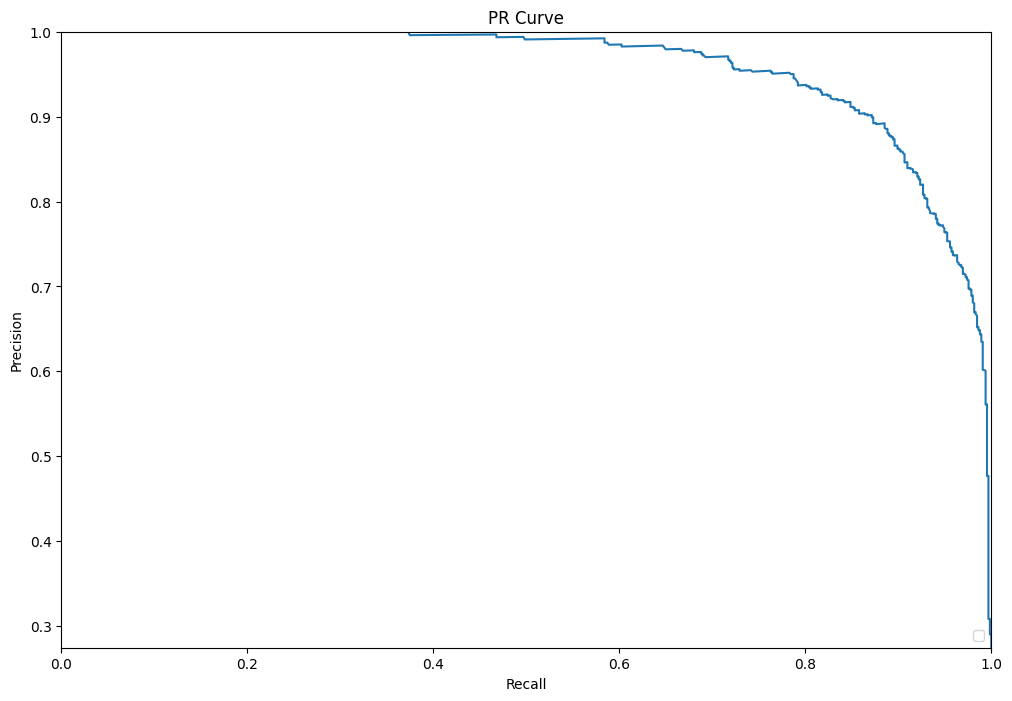

In [88]:
plt.figure(figsize = (12,8))
plt.plot(recalls, precisions)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

# Question 4

In [62]:

thresholds = np.arange(0.0, 1.01, 0.01)

f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    f1_scores.append(f1)

optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

# Print the optimal threshold and F1 score
print(f'Optimal Threshold: {optimal_threshold}')
print(f'Optimal F1 Score: {f1_scores[optimal_threshold_index]}')

Optimal Threshold: 0.48
Optimal F1 Score: 0.88871834228703


/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Not sure closest is .52?

# Question 5

In [82]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

for train_idx, val_idx in kf.split(df_full_train):
    df_train, df_val = df_full_train.iloc[train_idx], df_full_train.iloc[val_idx]
    y_train, y_val = df_train.above_average.values, df_val.above_average.values

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model.fit(X_train, y_train)
    
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    
    auc_score = roc_auc_score(y_val, y_pred_prob)
    
    auc_scores.append(auc_score)

std_deviation = np.std(auc_scores)

print(f'Standard Deviation of AUC Scores: {std_deviation}')

Standard Deviation of AUC Scores: 0.0026816024695757506


Appears to be .003

# Question 6

In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

for C in [0.01, 0.1, 0.5, 10]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    for train_idx, val_idx in kf.split(df_full_train):
        df_train, df_val = df_full_train.iloc[train_idx], df_full_train.iloc[val_idx]
        y_train, y_val = df_train.above_average.values, df_val.above_average.values

        dv = DictVectorizer(sparse=False)

        train_dict = df_train[features].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        val_dict = df_val[features].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        
        model.fit(X_train, y_train)
        
        y_pred_prob = model.predict_proba(X_val)[:, 1]
        
        auc_score = roc_auc_score(y_val, y_pred_prob)
        
        auc_scores.append(auc_score)

    std_deviation = np.std(auc_scores)
    average_scores = round(np.mean(auc_scores), 3)

    print(f'C: {C} Average Score: {average_scores} Standard Deviation: {std_deviation}')

C: 0.01 Average Score: 0.952 Standard Deviation: 0.002537552590615493
C: 0.1 Average Score: 0.962 Standard Deviation: 0.010311301902117402
C: 0.5 Average Score: 0.967 Standard Deviation: 0.011335423379858387
C: 10 Average Score: 0.971 Standard Deviation: 0.01188375738806606


Appears to be 10